# Case Study on Loan Providing

This case study addresses a very common problem in the Banking industry. "To approve or reject this loan application?". The bank executives rely on extensive background checks to take the decision.

Since there are many applications which needs to be processed everyday.

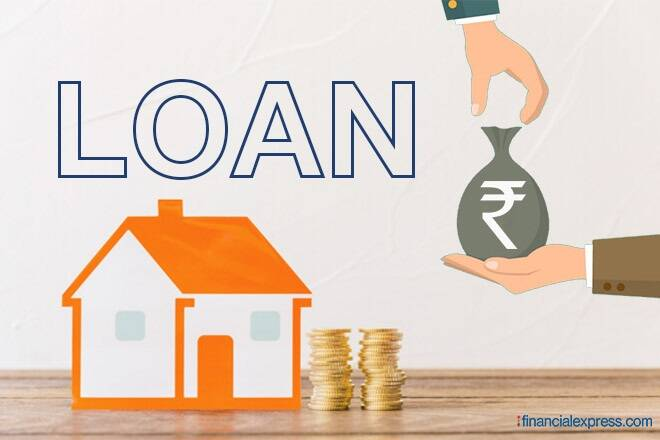

# Reading the data into python


## Dataset: file "Loan_Approval_Data.csv" 

This file contains the historical data of approvals and rejections of various applications.

The goal is to learn from this data and predict if a given loan application will be approved or rejected!

In [1]:
#importing the important libarary
import pandas as pd
import numpy as np

In [13]:
#reading the data 
LoanData = pd.read_csv("/Users/syedaskari/Desktop/Github/CaseStudy/Loan_Approval_Data.csv" , encoding='latin')
#printing the shape of the data
print('Shape before deleting duplicate values:', LoanData.shape)



Shape before deleting duplicate values: (614, 13)


In [15]:

# Removing duplicate rows if any
LoanData=LoanData.drop_duplicates()
print('Shape After deleting duplicate values:', LoanData.shape)

Shape After deleting duplicate values: (614, 13)


In [17]:
#printing the sample data
LoanData.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
LoanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [19]:
# Looking at the descriptive statistics of the data
LoanData.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002318,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


Removing useless variables from data
Based on the above basic analysis, removing "Loan_ID" column from the data

In [20]:
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['Loan_ID']
LoanData = LoanData.drop(UselessColumns,axis=1)
LoanData.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Visual Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>, <AxesSubplot:>]],
      dtype=object)

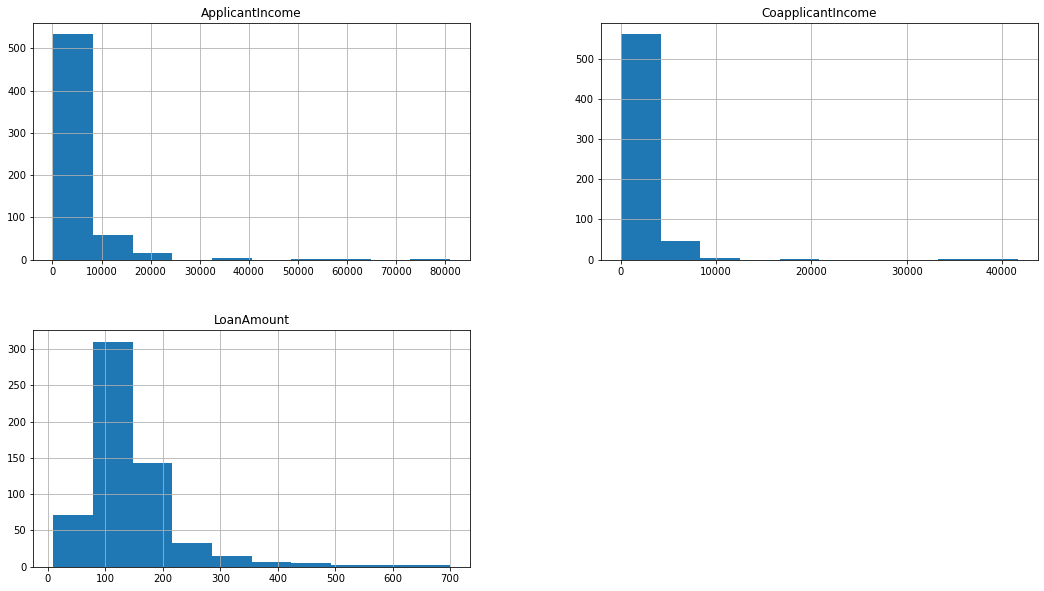

In [21]:
# Plotting histograms of multiple columns together
# Observe that ApplicantIncome and CoapplicantIncome has outliers
LoanData.hist(['ApplicantIncome', 'CoapplicantIncome','LoanAmount'], figsize=(18,10))

The X-axis shows the range of values and Y-axis represent the number of values in that range.  In the above histogram of "LoanAmount", there are around 320 rows in data that has a Loan Amount between 90 to 150.

* ApplicantIncome : Selected. Outliers seen beyond 30000, need to treat them.
* CoapplicantIncome: Selected. Outliers seen beyond 15000, need to treat them.
* LoanAmount: Selected. Slightly skewed distribution, acceptable.

### Outlier treatment
Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.



In [25]:
# Finding nearest values to 30000 mark
LoanData['ApplicantIncome'][LoanData['ApplicantIncome']>20000].sort_values()

130    20166
308    20233
284    20667
506    20833
126    23803
155    23803
171    23803
183    23803
185    23803
333    23803
409    23803
443    23803
Name: ApplicantIncome, dtype: int64

In [26]:
# Replacing outliers with nearest possibe value
LoanData['ApplicantIncome'][LoanData['ApplicantIncome']>30000] = 23803

<ipython-input-26-fccd51c296a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LoanData['ApplicantIncome'][LoanData['ApplicantIncome']>30000] = 23803


In [27]:
# Finding nearest values to 15000 mark
LoanData['CoapplicantIncome'][LoanData['CoapplicantIncome']>10000].sort_values()

9      10968.0
177    11300.0
402    20000.0
417    20000.0
581    33837.0
600    41667.0
Name: CoapplicantIncome, dtype: float64

In [28]:
# Replacing outliers with nearest possibe value
LoanData['CoapplicantIncome'][LoanData['CoapplicantIncome']>15000] = 11300

<ipython-input-28-df236e45490e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LoanData['CoapplicantIncome'][LoanData['CoapplicantIncome']>15000] = 11300


Visualizing distribution after outlier treatment

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>]], dtype=object)

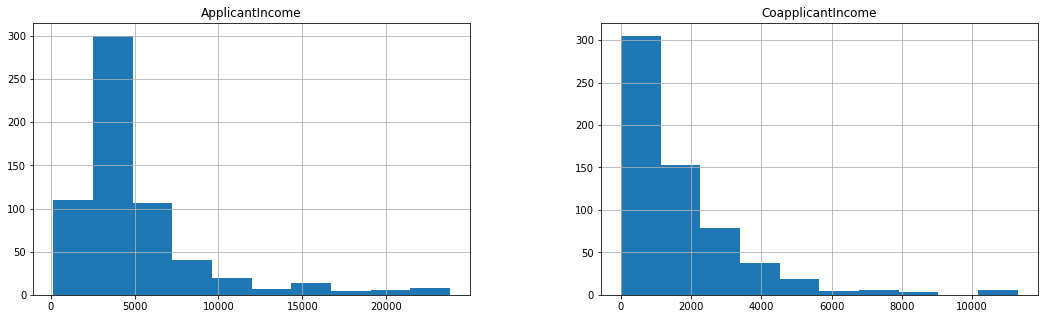

In [29]:
LoanData.hist(['ApplicantIncome', 'CoapplicantIncome'], figsize=(18,5))


## Missing values treatment

In [30]:
# Finding how many missing values are there for each column
LoanData.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
# Imputing the missing values
# Using MODE for categorical columns
LoanData['Gender'].fillna(LoanData['Gender'].mode()[0], inplace=True)
LoanData['Married'].fillna(LoanData['Married'].mode()[0], inplace=True)
LoanData['Dependents'].fillna(LoanData['Dependents'].mode()[0], inplace=True)
LoanData['Self_Employed'].fillna(LoanData['Self_Employed'].mode()[0], inplace=True)
# Using Mode value for Loan_Amount_Term since it is a categorical variable
LoanData['Loan_Amount_Term'].fillna(LoanData['Loan_Amount_Term'].mode()[0], inplace=True)
LoanData['Credit_History'].fillna(LoanData['Credit_History'].mode()[0], inplace=True)

# Using Median value for continuous columns
LoanData['LoanAmount'].fillna(LoanData['LoanAmount'].median(), inplace=True)

In [32]:
# Checking missing values again after the treatment
LoanData.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Selecting final predictors for Machine Learning

In [33]:
SelectedColumns=['Married', 'Education', 'Credit_History', 'Property_Area']

# Selecting final columns
DataForML=LoanData[SelectedColumns]
DataForML.head()

,Married,Education,Credit_History,Property_Area
0,No,Graduate,1.0,Urban
1,Yes,Graduate,1.0,Rural
2,Yes,Graduate,1.0,Urban
3,Yes,Not Graduate,1.0,Urban
4,No,Graduate,1.0,Urban


In [34]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')


## Data Pre-processing for Machine Learning


In [35]:
# Treating the binary nominal variables first
DataForML['Married'].replace({'Yes':1, 'No':0}, inplace=True)
DataForML['Education'].replace({'Graduate':1, 'Not Graduate':0}, inplace=True)

# Looking at data after nominal treatment
DataForML.head()

/Users/syedaskari/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,Married,Education,Credit_History,Property_Area
0,0,1,1.0,Urban
1,1,1,1.0,Rural
2,1,1,1.0,Urban
3,1,0,1.0,Urban
4,0,1,1.0,Urban


Converting the nominal variable to numeric

In [36]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Loan_Status']=LoanData['Loan_Status']

# Printing sample rows
DataForML_Numeric.head()

,Married,Education,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,0,1,1.0,0,0,1,Y
1,1,1,1.0,1,0,0,N
2,1,1,1.0,0,0,1,Y
3,1,0,1.0,0,0,1,Y
4,0,1,1.0,0,0,1,Y


Splitting the data into Training and Testing sample¶

In [38]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Married', 'Education', 'Credit_History', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status'],
      dtype='object')

In [39]:
# Separate Target Variable and Predictor Variables
TargetVariable='Loan_Status'
Predictors=['Married', 'Education', 'Credit_History', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban']

In [40]:
X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

In [41]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

## Standardization/Normalization of data

In [42]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(429, 6)
(429,)
(185, 6)
(185,)


## Decision Trees

In [44]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=2,criterion='entropy')

In [45]:
# Printing all the parameters of Decision Trees
print(clf)


DecisionTreeClassifier(criterion='entropy', max_depth=2)


In [46]:

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

In [47]:

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           N       0.93      0.42      0.57        65
           Y       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]


In [48]:
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))


Accuracy of the model on Testing Sample Data: 0.76


<AxesSubplot:>

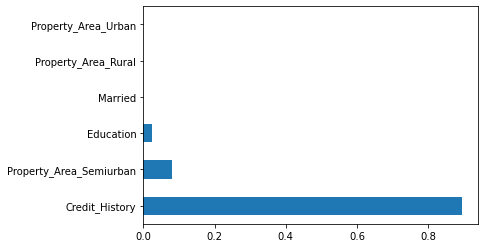

In [49]:
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [51]:
!pip install dtreeplt

/Users/syedaskari/opt/anaconda3/lib/python3.8/site-packages/dtreeplt/dtreeplt.py:256: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='', xy=(dx, dy), xytext=(x, y),


NameError: name 'plt' is not defined

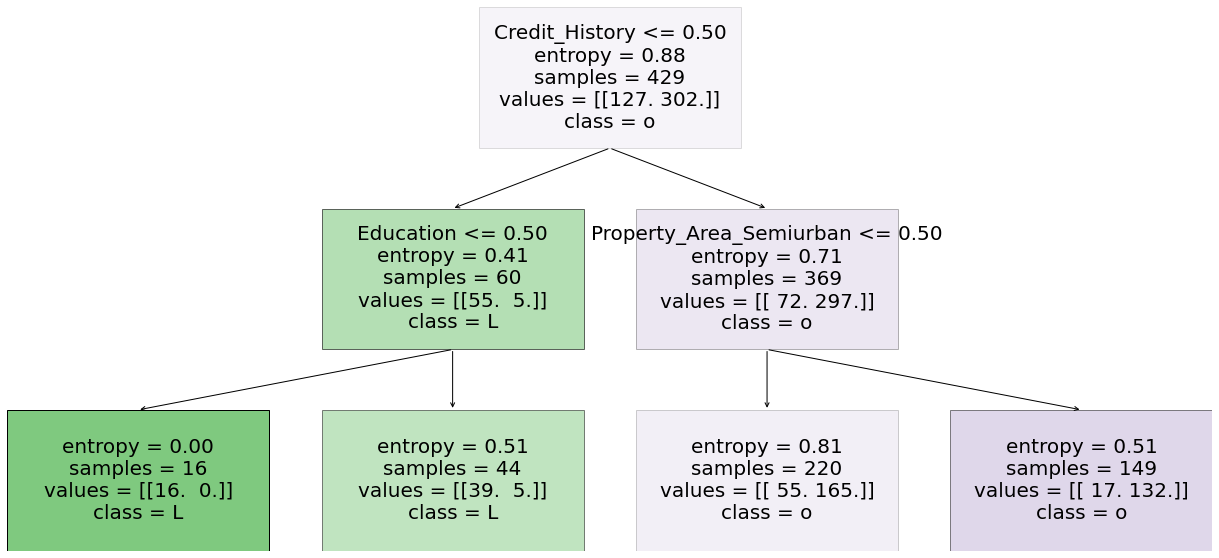

In [52]:
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf, feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()
currentFigure=plt.gcf()
currentFigure.set_size_inches(20,10)

## Naive Bayes

In [53]:
# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [54]:
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
#clf = MultinomialNB()

In [55]:
# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

GaussianNB()


In [56]:
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           N       0.93      0.42      0.57        65
           Y       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]


In [57]:

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

Accuracy of the model on Testing Sample Data: 0.76


## Adaboost

In [58]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier



In [ ]:
# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=500, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)



In [60]:
# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))



              precision    recall  f1-score   support

           N       0.93      0.42      0.57        65
           Y       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]
Accuracy of the model on Testing Sample Data: 0.76


Conclusion:
    loans can be mainly classfied based propery , credit scor and proof of income.
    we could see that a great credit history greater than 50% are god loans while less credit history are bad loans
    

In [ ]:
from flask import Flask,request,jsonify
import pickle
import pandas as pd
import numpy

In [ ]:
app = Flask(__name__)

@app.route('/get_loan_prediction', methods=["GET"])
def get_loan_prediction():
    try:
        # Getting the paramters from API call
        married_value = request.args.get('Married')
        education_value = request.args.get('Education')

In [ ]:
# This Function can be called from any from any front end tool/website
def PredictLoanStatus(InputLoanDetails):
    import pandas as pd
    Num_Inputs=InputLoanDetails.shape[0]